In [2]:
%reload_ext autoreload
%autoreload 2

import sys
from tqdm import tqdm
import h5py
import numpy as np

sys.path.append("..")
import axionmirror.units_constants as uc

from config import pc_dict

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

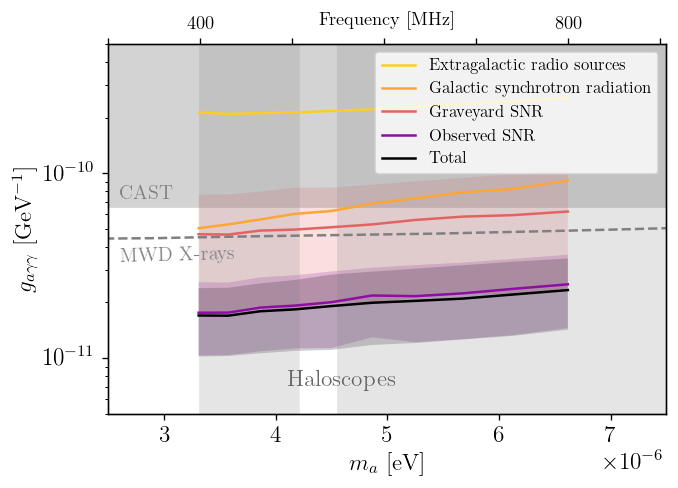

In [10]:
config_name = 'CHIME'
pc = pc_dict[config_name]

plot_names = ['egrs', 'gsr', 'snrg-base', 'snro-base', 'total-base']
plot_all_samples = False

label_dict = {
    'egrs' : 'Extragalactic radio sources',
    'gsr' : 'Galactic synchrotron radiation',
    'snrg-base' : 'Graveyard SNR',
    'snro-base' : 'Observed SNR',
    'total-base' : 'Total',
}
color_dict = {
    'egrs' : cms['plasma'](0.9),
    'gsr' : cms['plasma'](0.8),
    'snrg-base' : cms['plasma'](0.6),
    'snro-base' : cms['plasma'](0.3),
    'total-base' : 'k',
}

fig, ax = plt.subplots()

for pn in plot_names:
    with h5py.File(f"../outputs/plot_data/{pc.name}/{pn}.h5", 'r') as hf:
        # nu_arr = np.delete(hf['nu'][:], 18, axis=0)
        # gagg_arr = np.delete(hf['gagg'][:], 18, axis=1)
        nu_arr = hf['nu'][:]
        gagg_arr = hf['gagg'][:]
        
        ma_arr = 4 * np.pi * uc.hbar * nu_arr / uc.eV
        
        if gagg_arr.shape[0] == 1:
            ax.plot(ma_arr, gagg_arr[0], color=color_dict[pn], label=label_dict[pn])
        else:
            if plot_all_samples:
                for i, gagg_sample in enumerate(gagg_arr):
                    ax.plot(ma_arr, gagg_sample, color=color_dict[pn], alpha=0.1,
                            label=(label_dict[pn] if i==0 else None), zorder=-1)
            else:
                ax.plot(ma_arr, np.median(gagg_arr, axis=0), color=color_dict[pn], label=label_dict[pn])
                ax.fill_between(ma_arr, np.quantile(gagg_arr, 0.95, axis=0), np.quantile(gagg_arr, 0.05, axis=0),
                                alpha=0.2, facecolor=color_dict[pn], edgecolor='none')

ax.fill_between([1e-6, 1e-5], uc.gagg_CAST/uc.invGeV, 1e-8, color='lightgray', zorder=-1)
ax.text(2.6e-6, 7.3e-11, 'CAST', color='gray')
# limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/PulsarPolarCap.txt", unpack=True)
# ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='-')
# ax.text(2.6e-6, 2e-12, 'Pulsar polar cap', color='gray', rotation=-1.2)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/MWDXrays.txt", unpack=True)
ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='--')
ax.text(2.6e-6, 3.3e-11, 'MWD X-rays', color='gray', rotation=1.5)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/ADMX2021.txt", unpack=True)
ax.fill_between(limit_ma_arr, limit_gagg_arr, np.full_like(limit_gagg_arr, 1), color='gray', alpha=0.2, ec=None)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/RBF_UF_Haloscopes.txt", unpack=True)
ax.fill_between(limit_ma_arr, limit_gagg_arr, np.full_like(limit_gagg_arr, 1), color='gray', alpha=0.2, ec=None)
ax.text(4.1e-6, 7e-12, 'Haloscopes', color=cms['binary'](0.6), fontsize=14)

ax.set(xlim=(2.5e-6, 7.5e-6), ylim=(5e-12, 5e-10), yscale='log')
ax.set(xlabel='$m_a$ [eV]', ylabel=r'$g_{a\gamma\gamma}$ [GeV$^{-1}$]')

ax_top = ax.twiny()
ax_top.set_xlim(np.array(ax.get_xlim()) * uc.eV / (4*np.pi*uc.hbar))
ax_top.set_xlabel('Frequency [MHz]', fontsize=11)
ax_top.set_xticks([300, 400, 500, 600, 700, 800, 900])
ax_top.set_xticklabels(['', '400', '', '', '', '800', ''], fontsize=11)
ax_top.xaxis.set_label_coords(0.5, 1.05)

ax.legend(loc='upper right', fontsize=10)
fig.savefig(f'../outputs/reach_plots/{config_name}.pdf')

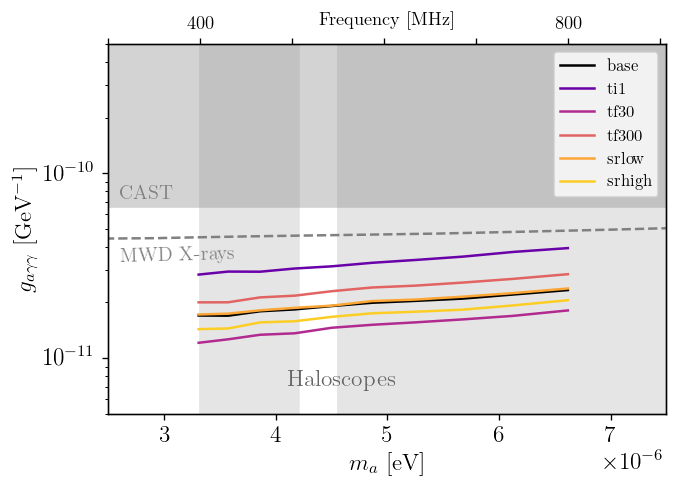

In [11]:
config_name = 'CHIME'
pc = pc_dict[config_name]

plot_names = ['total-base', 'total-ti1', 'total-tf30', 'total-tf300', 'total-srlow', 'total-srhigh']
plot_all_samples = False

label_dict = {
    'total-base' : 'base',
    'total-ti1' : 'ti1',
    'total-tf30' : 'tf30',
    'total-tf300' : 'tf300',
    'total-srlow' : 'srlow',
    'total-srhigh' : 'srhigh',
}
color_dict = {
    'total-base' : 'k',
    'total-ti1' : cms['plasma'](0.2),
    'total-tf30' : cms['plasma'](0.4),
    'total-tf300' : cms['plasma'](0.6),
    'total-srlow' : cms['plasma'](0.8),
    'total-srhigh' : cms['plasma'](0.9),
}

fig, ax = plt.subplots()

for pn in plot_names:
    with h5py.File(f"../outputs/plot_data/{pc.name}/{pn}.h5", 'r') as hf:
        # nu_arr = np.delete(hf['nu'][:], 18, axis=0)
        # gagg_arr = np.delete(hf['gagg'][:], 18, axis=1)
        nu_arr = hf['nu'][:]
        gagg_arr = hf['gagg'][:]
        
        ma_arr = 4 * np.pi * uc.hbar * nu_arr / uc.eV
        
        if gagg_arr.shape[0] == 1:
            ax.plot(ma_arr, gagg_arr[0], color=color_dict[pn], label=label_dict[pn])
        else:
            if plot_all_samples:
                for i, gagg_sample in enumerate(gagg_arr):
                    ax.plot(ma_arr, gagg_sample, color=color_dict[pn], alpha=0.1,
                            label=(label_dict[pn] if i==0 else None), zorder=-1)
            else:
                ax.plot(ma_arr, np.median(gagg_arr, axis=0), color=color_dict[pn], label=label_dict[pn])
                # ax.fill_between(ma_arr, np.quantile(gagg_arr, 0.95, axis=0), np.quantile(gagg_arr, 0.05, axis=0),
                #                 alpha=0.2, facecolor=color_dict[pn], edgecolor='none')

ax.fill_between([1e-6, 1e-5], uc.gagg_CAST/uc.invGeV, 1e-8, color='lightgray', zorder=-1)
ax.text(2.6e-6, 7.3e-11, 'CAST', color='gray')
# limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/PulsarPolarCap.txt", unpack=True)
# ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='-')
# ax.text(2.6e-6, 2e-12, 'Pulsar polar cap', color='gray', rotation=-1.2)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/MWDXrays.txt", unpack=True)
ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='--')
ax.text(2.6e-6, 3.3e-11, 'MWD X-rays', color='gray', rotation=1.5)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/ADMX2021.txt", unpack=True)
ax.fill_between(limit_ma_arr, limit_gagg_arr, np.full_like(limit_gagg_arr, 1), color='gray', alpha=0.2, ec=None)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/RBF_UF_Haloscopes.txt", unpack=True)
ax.fill_between(limit_ma_arr, limit_gagg_arr, np.full_like(limit_gagg_arr, 1), color='gray', alpha=0.2, ec=None)
ax.text(4.1e-6, 7e-12, 'Haloscopes', color=cms['binary'](0.6), fontsize=14)

ax.set(xlim=(2.5e-6, 7.5e-6), ylim=(5e-12, 5e-10), yscale='log')
ax.set(xlabel='$m_a$ [eV]', ylabel=r'$g_{a\gamma\gamma}$ [GeV$^{-1}$]')

ax_top = ax.twiny()
ax_top.set_xlim(np.array(ax.get_xlim()) * uc.eV / (4*np.pi*uc.hbar))
ax_top.set_xlabel('Frequency [MHz]', fontsize=11)
ax_top.set_xticks([300, 400, 500, 600, 700, 800, 900])
ax_top.set_xticklabels(['', '400', '', '', '', '800', ''], fontsize=11)
ax_top.xaxis.set_label_coords(0.5, 1.05)

ax.legend(loc='upper right', fontsize=10)

### 1.2 Different telescopes

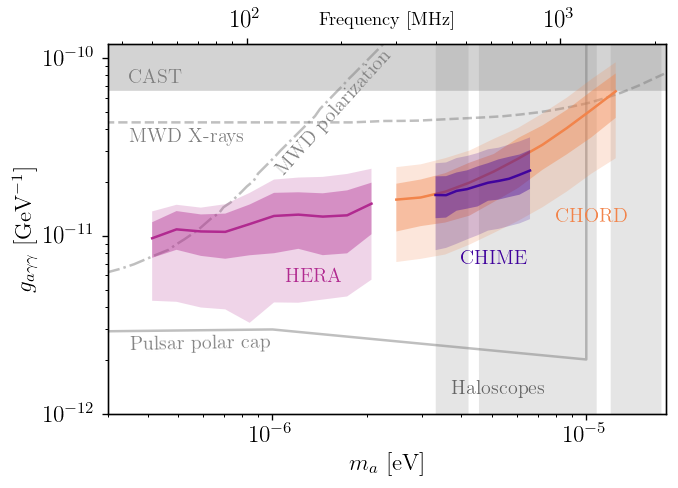

In [23]:
from config import pc_dict
pc_names = ['HERA', 'CHORD', 'CHIME']
plot_all_samples = False
inline_legend = True
crude_estimate_pc_names = ['CHIME', 'HERA', 'CHORD', 'HIRAX256', 'HIRAX1024', 'BURSTT256', 'BURSTT2048']
crude_estimate_pc_names = []

label_dict = {
    'CHIME' : 'CHIME',
    'HERA' : 'HERA',
    'CHORD' : 'CHORD',
    'HIRAX256' : 'HIRAX-256',
    'HIRAX1024' : 'HIRAX-1024',
    'BURSTT256' : 'BURSTT-256',
    'BURSTT2048' : 'BURSTT-2048',
}
color_dict = {
    'CHIME' : cms['plasma'](0.1),
    'HERA' : cms['plasma'](0.4),
    'CHORD' : cms['plasma'](0.7),
    'HIRAX256' : cms['plasma'](0.2),
    'HIRAX1024' : cms['plasma'](0.0),
    'BURSTT256' : 'r',
    'BURSTT2048' : 'k',
}
alphas_dict = {
}
zorder_dict = {
    'CHIME' : 10,
    'HERA' : 9,
    'CHORD' : 8,
    'HIRAX256' : 7,
    'HIRAX1024' : 6,
    'BURSTT256' : 5,
    'BURSTT2048' : 4,
}

fig, ax = plt.subplots()

for pc_name in pc_names:

    pc = pc_dict[pc_name]

    with h5py.File(f"../outputs/plot_data/{pc.name}/total-base.h5", 'r') as hf:
        nu_arr = np.array(hf['nu'][:])
        gagg_arr = np.array(hf['gagg'][:])
        
        ma_arr = 4 * np.pi * uc.hbar * nu_arr / uc.eV
        color = color_dict[pc_name]
        label = label_dict[pc_name]
        
        if gagg_arr.shape[0] == 1:
            ax.plot(ma_arr, gagg_arr[0], color=color, label=label_dict[pc_name])
        else:
            if plot_all_samples:
                for i, gagg_sample in enumerate(gagg_arr):
                    ax.plot(ma_arr, gagg_sample, color=color, alpha=0.1,
                            label=(label if i==0 else None), zorder=-1)
            else:
                alphas = alphas_dict[pc_name] if pc_name in alphas_dict else [0.4, 0.2]

                ax.plot(ma_arr, np.median(gagg_arr, axis=0), color=color, label=label, zorder=zorder_dict[pc_name])
                ax.fill_between(ma_arr, np.quantile(gagg_arr, 0.84, axis=0), np.quantile(gagg_arr, 0.16, axis=0),
                                alpha=alphas[0], facecolor=color, edgecolor='none', zorder=zorder_dict[pc_name])
                ax.fill_between(ma_arr, np.quantile(gagg_arr, 0.975, axis=0), np.quantile(gagg_arr, 0.025, axis=0),
                                alpha=alphas[1], facecolor=color, edgecolor='none', zorder=zorder_dict[pc_name])
                
for pc_name in crude_estimate_pc_names:
    pc = pc_dict[pc_name]
    nu_est_s = pc.nu_s
    gagg_est_s = pc.telescope.sens_estimate(nu_est_s)
    ma_est_s = 4 * np.pi * uc.hbar * nu_est_s / uc.eV
    color = color_dict[pc_name]
    ax.plot(ma_est_s, gagg_est_s, color=color, ls=':')

ax.fill_between([1e-8, 1e-4], uc.gagg_CAST/uc.invGeV, 1e-8, color='lightgray', zorder=-1)
ax.text(3.5e-7, 7.3e-11, 'CAST', color='gray')
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/PulsarPolarCap.txt", unpack=True)
ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='-', alpha=0.5)
ax.text(3.5e-7, 2.3e-12, 'Pulsar polar cap', color='gray', rotation=1)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/MWDPolarisation.txt", unpack=True)
ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='-.', alpha=0.5)
ax.text(1.0e-6, 2.2e-11, 'MWD polarization', color='gray', rotation=48)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/MWDXrays.txt", unpack=True)
ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='--', alpha=0.5)
ax.text(3.5e-7, 3.4e-11, 'MWD X-rays', color='gray')
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/ADMX2021.txt", unpack=True)
ax.fill_between(limit_ma_arr, limit_gagg_arr, np.full_like(limit_gagg_arr, 1), color='gray', alpha=0.2, ec=None)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/RBF_UF_Haloscopes.txt", unpack=True)
ax.fill_between(limit_ma_arr, limit_gagg_arr, np.full_like(limit_gagg_arr, 1), color='gray', alpha=0.2, ec=None)
ax.text(3.7e-6, 1.3e-12, 'Haloscopes', color=cms['binary'](0.6))

ax.set(yscale='log', xscale='log')
ax.set(xlim=(3e-7, 1.8e-5), ylim=(1e-12, 1.2e-10))
ax.set(xlabel='$m_a$ [eV]', ylabel=r'$g_{a\gamma\gamma}$ [GeV$^{-1}$]')

ax_top = ax.twiny()
ax_top.set(xscale=ax.get_xscale())
ax_top.set_xlim(np.array(ax.get_xlim()) * uc.eV / (4 * np.pi * uc.hbar))
ax_top.set_xlabel('Frequency [MHz]', fontsize=11)
ax_top.xaxis.set_label_coords(0.5, 1.05)

if inline_legend:
    if 'HERA' in pc_names:
        ax.text(1.1e-6, 5.5e-12, 'HERA', color=color_dict['HERA'])
    if 'CHORD' in pc_names:
        ax.text(8e-6, 1.2e-11, 'CHORD', color=color_dict['CHORD'], rotation=0)
    if 'CHIME' in pc_names:
        ax.text(4e-6, 7e-12, 'CHIME', color=color_dict['CHIME'])
    if 'HIRAX1024' in pc_names:
        ax.text(7e-6, 5e-12, 'HIRAX-1024', color=color_dict['HIRAX1024'])
else:
    ax.legend(loc='upper right', fontsize=10)
fig.savefig('../outputs/reach_plots/HCC.pdf')